# <p style="text-align:center" color="red"><span style="color:red">Health Diagnostics Data</span></p>
## <p style="text-align:center" color="green"><span style="color:green">`PCA` Vs. `t-SNE` Vs. `UMAP` Vs. `LDA`</span></p>



## Table of Contents:

* [Import libraries](#Import-libraries)
* [Data Simulation](#Data-Simulation)
* [Standardizing the Data](#Standardizing-Data)
* [Principal Component Analysis (PCA)](#Principal-Component-Analysis-PCA)
* [t-Distributed Stochastic Neighbor Embedding (t-SNE)](#t-Distributed-Stochastic-Neighbor-Embedding-t-SNE)
* [Uniform Manifold Approximation and Projection (UMAP)](#Uniform-Manifold-Approximation-and-Projection-UMAP)
* [Linear Discriminant Analysis (LDA)](#Linear-Discriminant-Analysis-LDA)
* [Comparison and Conclusion](#Comparison-and-Conclusion)

## Import libraries <a class="anchor" id="Import-libraries"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import plotly.express as px

## Data Simulation <a class="anchor" id="Data-Simulation"></a>
In this section, we simulate a high-dimensional dataset for health diagnostics. The dataset will represent various health conditions and will be used to apply and compare different dimensionality reduction techniques.

- Let's generate a dataset with 1500 samples and 50 features.
- The data will be grouped into 6 distinct health categories.

In [2]:
# Parameters for the new dataset
n_samples = 1500  # Total number of samples
n_features = 70   # Total number of features
centers = 6       # Total number of centers (categories for Health Diagnostics)
cluster_std = 7 # Standard deviation of each cluster (higher value indicates more separation)

# Simulating the dataset for Health Diagnostics with controlled cluster separation
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers,
                  cluster_std=cluster_std, random_state=42)

# Assigning health-related labels to each category
health_labels = {
    0: 'Healthy',
    1: 'Pre-Diabetes',
    2: 'Diabetes',
    3: 'Pre-Heart Disease',
    4: 'Heart Disease',
    5: 'Chronic Conditions'
}
y_labels = np.array([health_labels[label] for label in y])

# Creating a DataFrame for better visualization
health_df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(n_features)])
health_df['Health_Condition'] = y_labels

# Displaying the first few rows of the DataFrame
health_df.head()

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -0.154634   2.354732   3.137791   0.046768  -0.547261  -5.759443   
1  11.060634  -9.535783   2.380371 -11.574814  18.681796  -6.946859   
2   1.275092 -10.754551  -4.252939  12.643670   9.723901   1.601242   
3   3.480433 -23.271475  -6.175112   5.030400  12.410422   6.088867   
4  -4.741100   2.871213   4.354581 -12.486378   5.128831  -5.047503   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_62  Feature_63  \
0  -1.756417   1.162850   6.229424    9.426851  ...    6.248020   -3.348958   
1  -8.282790  -4.071978  -0.817125   -3.868337  ...    7.934518   -7.930475   
2   7.566312  -7.742701  -9.384508  -14.168076  ...   -5.390789  -16.608130   
3  10.574667  -0.188836  -3.752705   -7.688381  ...    3.110139    7.789167   
4  -2.694621   5.757898  -1.708536   -4.387548  ...   11.206988    3.016820   

   Feature_64  Feature_65  Feature_66  Feature_67  Feature_68  Feature_69  \
0    7.473414    3.705783    5.570115   13.905709    7.609289    1.191813   
1    5.573572    1.172301    2.768406   12.155986  -13.907442   -7.055878   
2   -4.822731   19.019795  -11.183638   -8.929437   -4.680439   15.905608   
3   -0.844209    7.223066    3.302938    6.270294  -13.571438   -2.746557   
4    6.103672    2.481577    2.636430   -7.383904   -5.165574   -8.791755   

   Feature_70   Health_Condition  
0   -6.756795  Pre-Heart Disease  
1  -13.979700      Heart Disease  
2   12.689606       Pre-Diabetes  
3    6.673445       Pre-Diabetes  
4   -5.758564  Pre-Heart Disease  

[5 rows x 71 columns]

## <span style="color:green">Standardizing the Data</span> <a class="anchor" id="Standardizing-Data"></a>

Dimensionality reduction techniques often perform better on standardized data. Here, we scale the features to have a mean of 0 and a standard deviation of


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(health_df.drop('Health_Condition', axis=1))

## <span style="color:green">Principal Component Analysis (PCA)</span> <a class="anchor" id="Principal-Component-Analysis-PCA"></a>
We start with PCA to reduce the dimensions of our dataset while trying to retain as much variance as possib


In [4]:
# Apply PCA for 2 components as we need 2 dimensions for 2D plot
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Apply PCA for 3 components as we need 3 dimensions for 3D plot
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

#### <span style="color:blue">PCA - 2D Visualization</span>

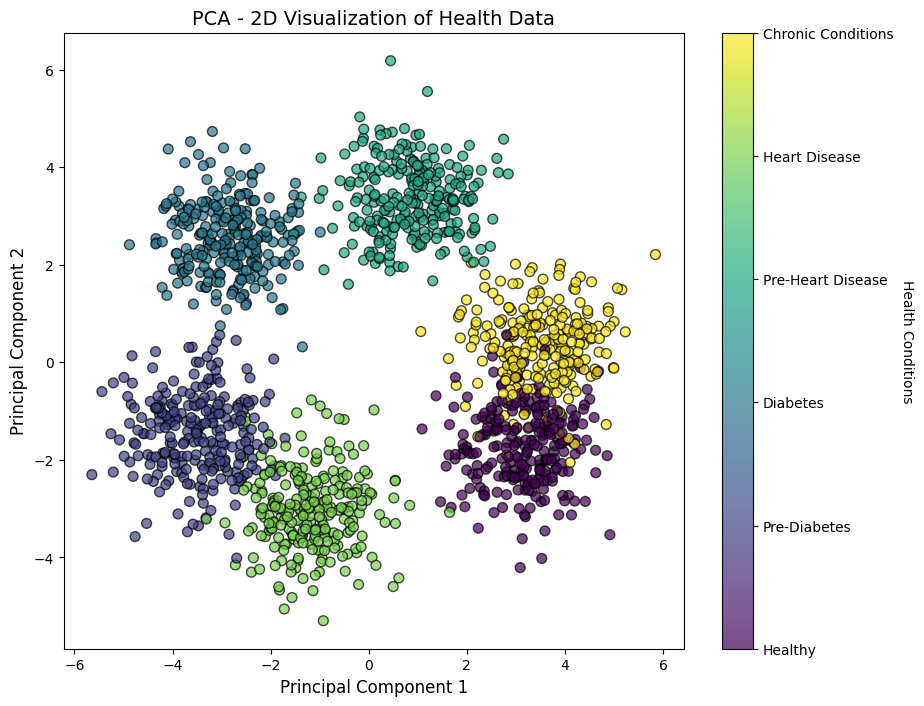

In [47]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.title("PCA - 2D Visualization of Health Data", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# Adding a color bar with labels
cbar = plt.colorbar(scatter)
cbar.set_label('Health Conditions', rotation=270, labelpad=15)
cbar.set_ticks(range(len(health_labels)))
cbar.set_ticklabels(list(health_labels.values()))

plt.show()

#### <span style="color:blue">PCA - 3D Visualization</span>

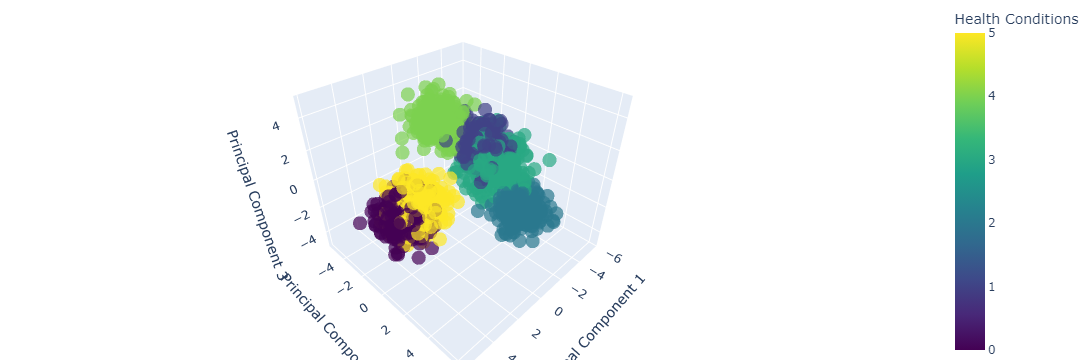

In [5]:
fig = px.scatter_3d(
    x=X_pca_3d[:, 0],
    y=X_pca_3d[:, 1],
    z=X_pca_3d[:, 2],
    color=y,
    color_continuous_scale=px.colors.sequential.Viridis,  # Enhanced color scale
    title="PCA - 3D Visualization of Health Data",
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'},
    opacity=0.7  # Setting the opacity to make overlapping points more visible
)

# Customizing the layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), coloraxis_colorbar=dict(title='Health Conditions'))

fig.show()

## <span style="color:green">t-Distributed Stochastic Neighbor Embedding (t-SNE)</span> <a class="anchor" id="t-Distributed-Stochastic-Neighbor-Embedding-t-SNE"></a>


t-SNE is a powerful tool for creating compelling two-dimensional maps from high-dimensional dat


In [6]:
# Apply t-SNE for 2 components as we need 2 dimensions for 2D plot
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

# Apply t-SNE for 3 components as we need 3 dimensions for 3D plot
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

#### <span style="color:blue">t-SNE - 2D Visualization</span>

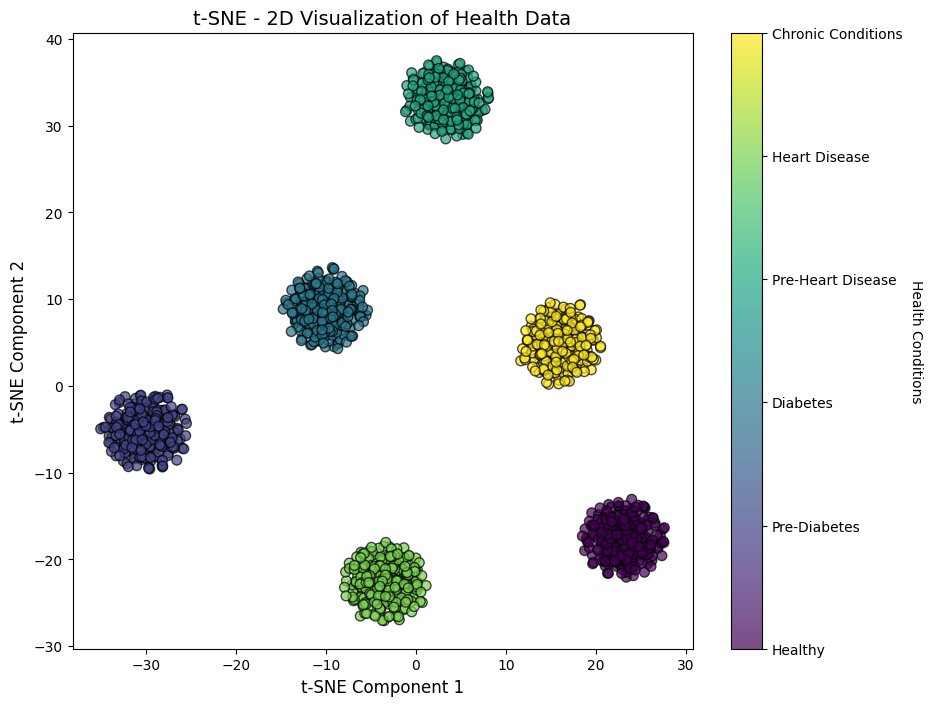

In [50]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.title("t-SNE - 2D Visualization of Health Data", fontsize=14)
plt.xlabel("t-SNE Component 1", fontsize=12)
plt.ylabel("t-SNE Component 2", fontsize=12)

# Adding a color bar with labels
cbar = plt.colorbar(scatter)
cbar.set_label('Health Conditions', rotation=270, labelpad=15)
cbar.set_ticks(range(len(health_labels)))
cbar.set_ticklabels(list(health_labels.values()))

plt.show()

#### <span style="color:blue">t-SNE - 3D Visualization</span>

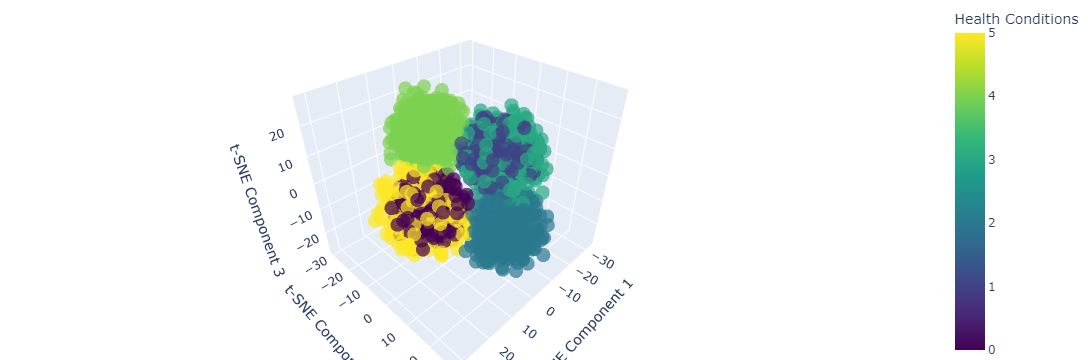

In [7]:
fig = px.scatter_3d(
    x=X_tsne_3d[:, 0],
    y=X_tsne_3d[:, 1],
    z=X_tsne_3d[:, 2],
    color=y,
    color_continuous_scale=px.colors.sequential.Viridis,
    title="t-SNE - 3D Visualization of Health Data",
    labels={'x': 't-SNE Component 1', 'y': 't-SNE Component 2', 'z': 't-SNE Component 3'},
    opacity=0.7
)

# Customizing the layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), coloraxis_colorbar=dict(title='Health Conditions'))

fig.show()

## <span style="color:green"> Uniform Manifold Approximation and Projection (UMAP)</span> <a class="anchor" id="Uniform-Manifold-Approximation-and-Projection-UMAP"></a>

UMAP is a relatively new technique that is particularly effective for large datase


In [52]:
# Apply UMAP for 2 components for 2D visualization
reducer_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = reducer_2d.fit_transform(X_scaled)

# Apply UMAP for 3 components for 3D visualization
reducer_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = reducer_3d.fit_transform(X_scaled)

#### <span style="color:blue">UMAP - 2D Visualization</span>

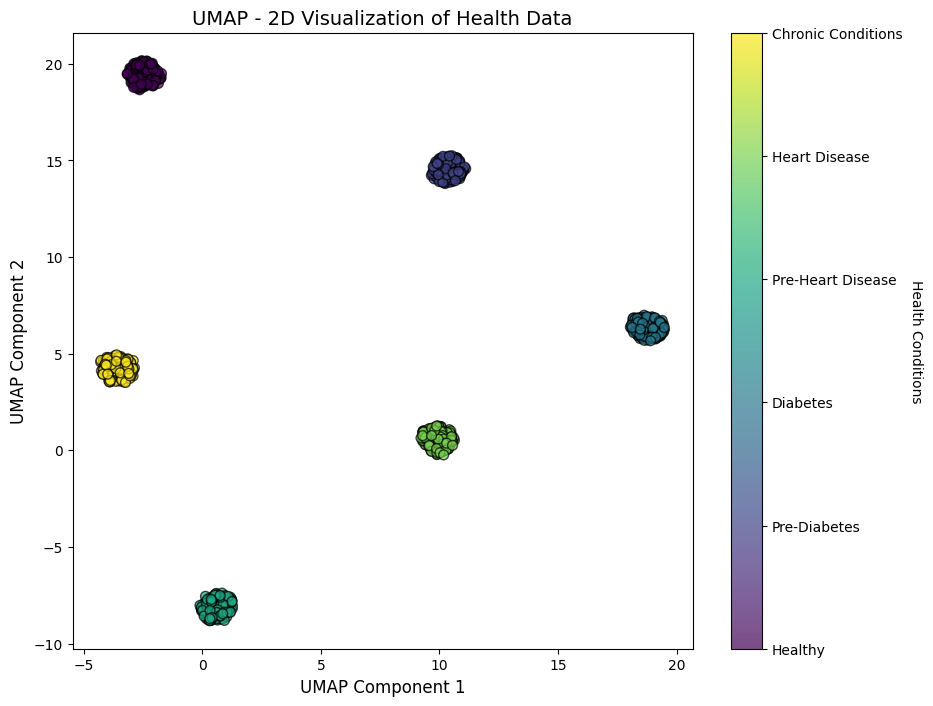

In [53]:
# 2D Visualization using Matplotlib for UMAP
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.title("UMAP - 2D Visualization of Health Data", fontsize=14)
plt.xlabel("UMAP Component 1", fontsize=12)
plt.ylabel("UMAP Component 2", fontsize=12)

# Adding a color bar with labels
cbar = plt.colorbar(scatter)
cbar.set_label('Health Conditions', rotation=270, labelpad=15)
cbar.set_ticks(range(len(np.unique(y))))
cbar.set_ticklabels(list(health_labels.values()))

plt.show()

#### <span style="color:blue">UMAP - 3D Visualization</span>

In [54]:
fig = px.scatter_3d(
    x=X_umap_3d[:, 0],
    y=X_umap_3d[:, 1],
    z=X_umap_3d[:, 2],
    color=y,
    color_continuous_scale=px.colors.sequential.Viridis,
    title="UMAP - 3D Visualization of Health Data",
    labels={'x': 'UMAP Component 1', 'y': 'UMAP Component 2', 'z': 'UMAP Component 3'},
    opacity=0.7
)

# Customizing the layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), coloraxis_colorbar=dict(title='Health Conditions'))

fig.show()

## <span style="color:green"> Linear Discriminant Analysis (LDA)</span> <a class="anchor" id="Linear-Discriminant-Analysis-LDA"></a>
LDA is a supervised dimensionality reduction technique, useful for class separability

In [8]:
# Apply LDA for 2 components as we need 2 dimensions for 2D plot
lda_2d = LDA(n_components=2)
X_lda_2d = lda_2d.fit_transform(X_scaled, health_df['Health_Condition'])

# Apply LDA for 3 components as we need 3 dimensions for 3D plot
lda_3d = LDA(n_components=3)
X_lda_3d = lda_3d.fit_transform(X_scaled, health_df['Health_Condition'])

#### <span style="color:blue">LDA - 2D Visualization</span>

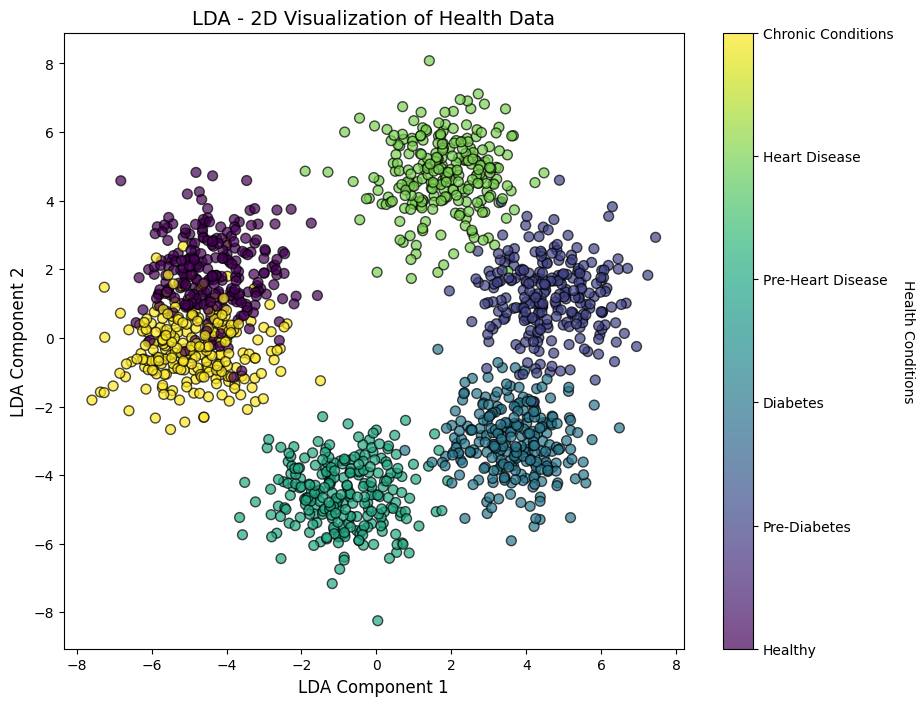

In [57]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lda_2d[:, 0], X_lda_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.title("LDA - 2D Visualization of Health Data", fontsize=14)
plt.xlabel("LDA Component 1", fontsize=12)
plt.ylabel("LDA Component 2", fontsize=12)

# Adding a color bar with labels
cbar = plt.colorbar(scatter)
cbar.set_label('Health Conditions', rotation=270, labelpad=15)
cbar.set_ticks(range(len(np.unique(y))))
cbar.set_ticklabels(list(health_labels.values()))

plt.show()

#### <span style="color:blue">LDA - 3D Visualization</span>

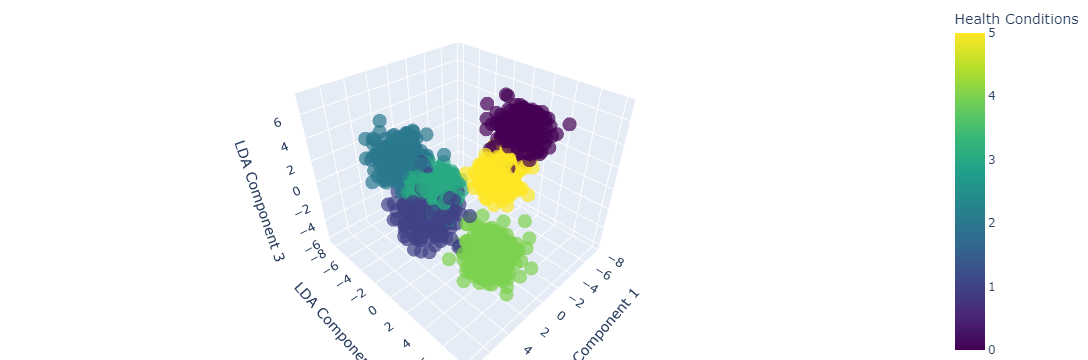

In [9]:
fig = px.scatter_3d(
    x=X_lda_3d[:, 0],
    y=X_lda_3d[:, 1],
    z=X_lda_3d[:, 2],
    color=y,
    color_continuous_scale=px.colors.sequential.Viridis,
    title="LDA - 3D Visualization of Health Data",
    labels={'x': 'LDA Component 1', 'y': 'LDA Component 2', 'z': 'LDA Component 3'},
    opacity=0.7
)

# Customizing the layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), coloraxis_colorbar=dict(title='Health Conditions'))

fig.show()

## <span style="color:green"> Comparison and Conclusion</span> <a class="anchor" id="Comparison-and-Conclusion"></a>


In [58]:
# https://archive.ph/2YdOX#selection-285.49-285.75
# https://www.kaggle.com/datasets/datamunge/sign-language-mnist/code

## <span style="color:green">Connect 🚀</span>
<div align="center">
  <a href="https://www.linkedin.com/in/labrijisaad/">
    <img src="https://img.shields.io/badge/LinkedIn-%230077B5.svg?&style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn" style="margin-bottom: 5px;"/>
  </a>
  <a href="https://github.com/labrijisaad">
    <img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" alt="GitHub" style="margin-bottom: 5px;"/>
  </a>
</div>